<ipython-input-3-dc3c68a70209>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_noise,color='c',Linewidth=1.5,label='Noisy')
<ipython-input-3-dc3c68a70209>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k',Linewidth=2,label='Clean')


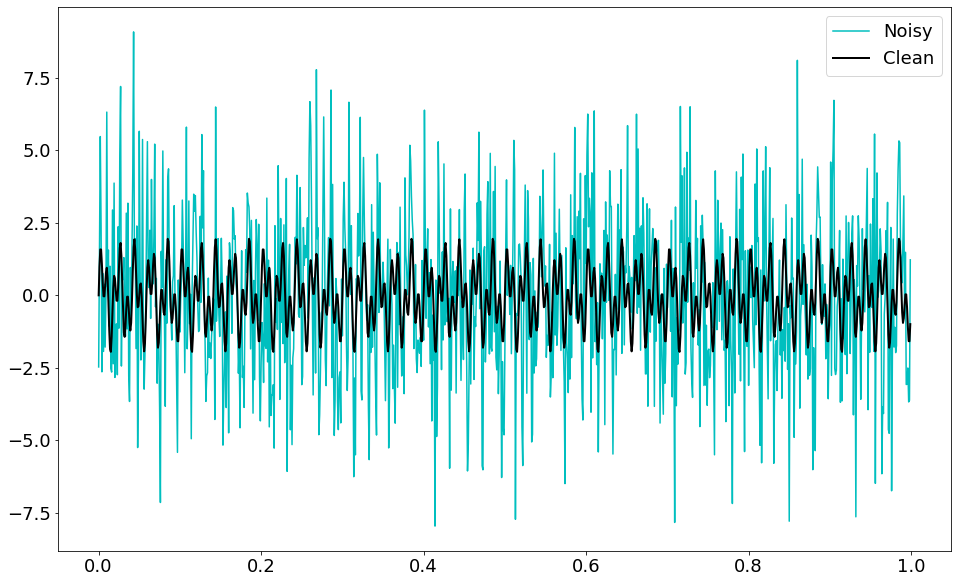

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16,10]
plt.rcParams.update({'font.size':18})

#Create a simple signal with two frequencies
data_step   = 0.001
t           = np.arange(start=0,stop=1,step=data_step)
f_clean     = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_noise     = f_clean + 2.5*np.random.randn(len(t))
plt.plot(t,f_noise,color='c',Linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',Linewidth=2,label='Clean')
plt.legend()

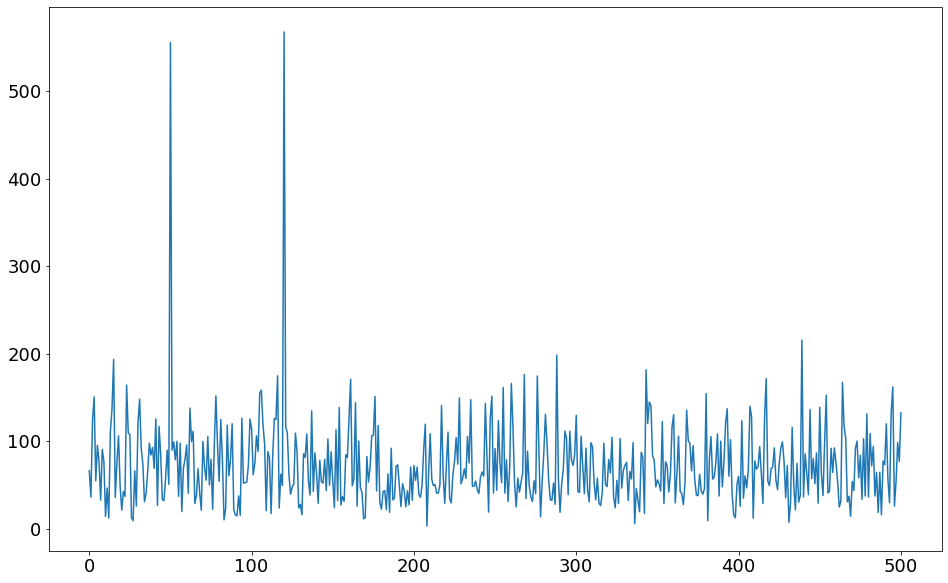

In [4]:
from scipy.fft import rfft,rfftfreq
n    = len(t)
yf   = rfft(f_noise)
xf   = rfftfreq(n,data_step)
plt.plot(xf,np.abs(yf))

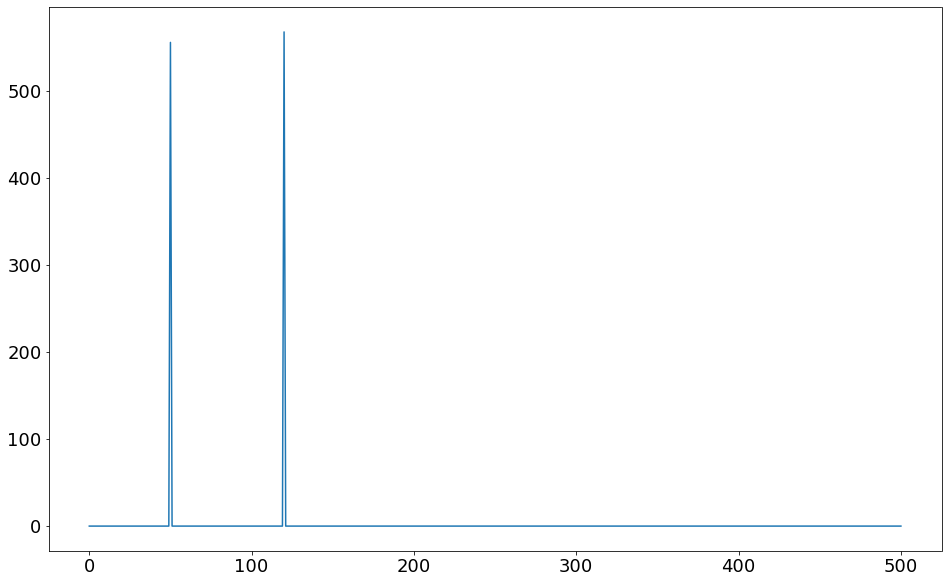

In [5]:
yf_abs      = np.abs(yf) 
indices     = yf_abs>300   # filter out those value under 300
yf_clean    = indices * yf # noise frequency will be set to 0
plt.plot(xf,np.abs(yf_clean))

(-6.0, 8.0)

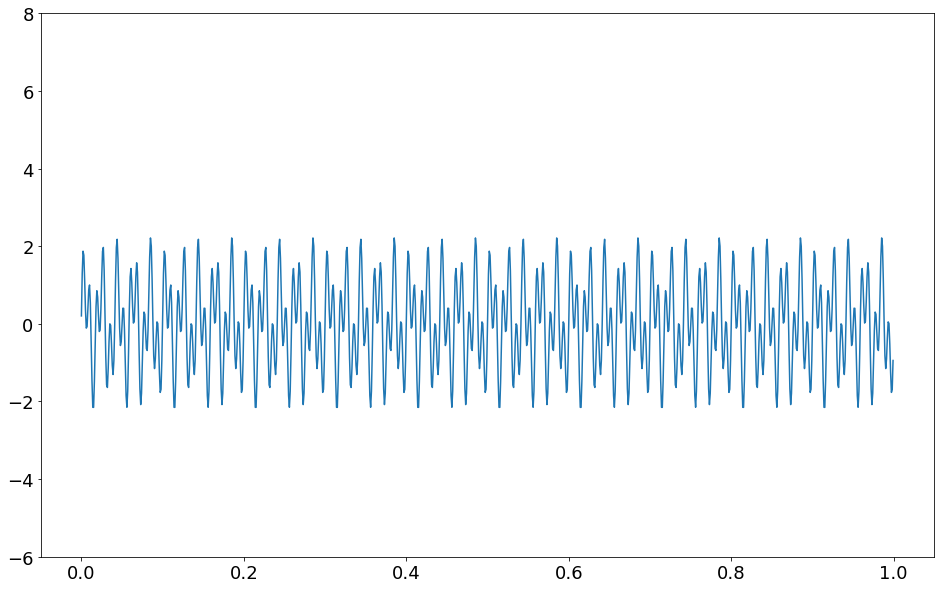

In [6]:
from scipy.fft import irfft
new_f_clean = irfft(yf_clean)
plt.plot(t,new_f_clean)
plt.ylim(-6,8)

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import bt

In [8]:
yahoo_data = yf.download("ABB.NS", start="2021-01-01", end="2022-07-31", interval='1d')



[*********************100%***********************]  1 of 1 completed


In [9]:
data=yahoo_data[['Close']]
data

,Close
Date,
2021-01-01,1232.699951
2021-01-04,1262.900024
2021-01-05,1293.599976
2021-01-06,1297.650024
2021-01-07,1302.650024
...,...
2022-07-25,2662.899902
2022-07-26,2713.399902
2022-07-27,2728.149902


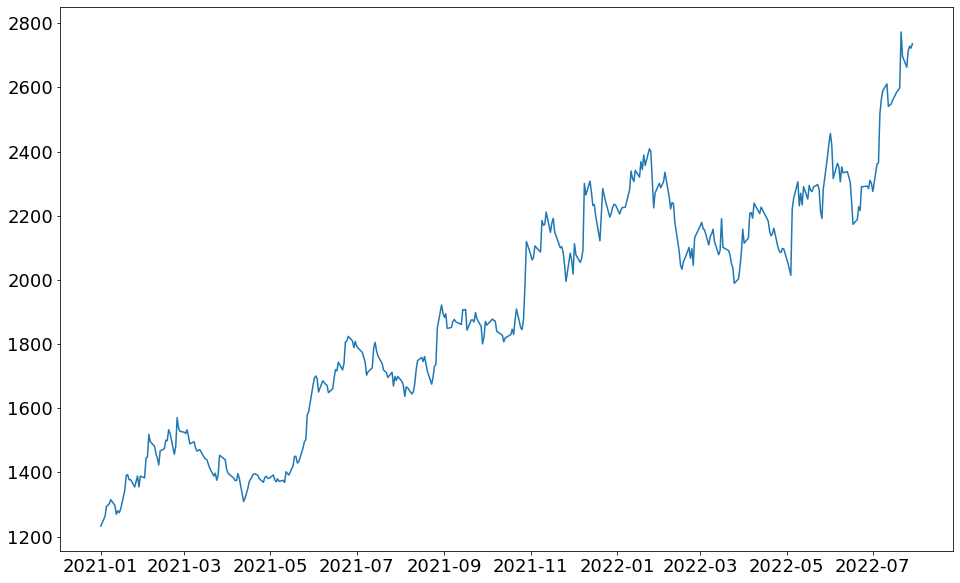

In [10]:
plt.plot(data['Close'])

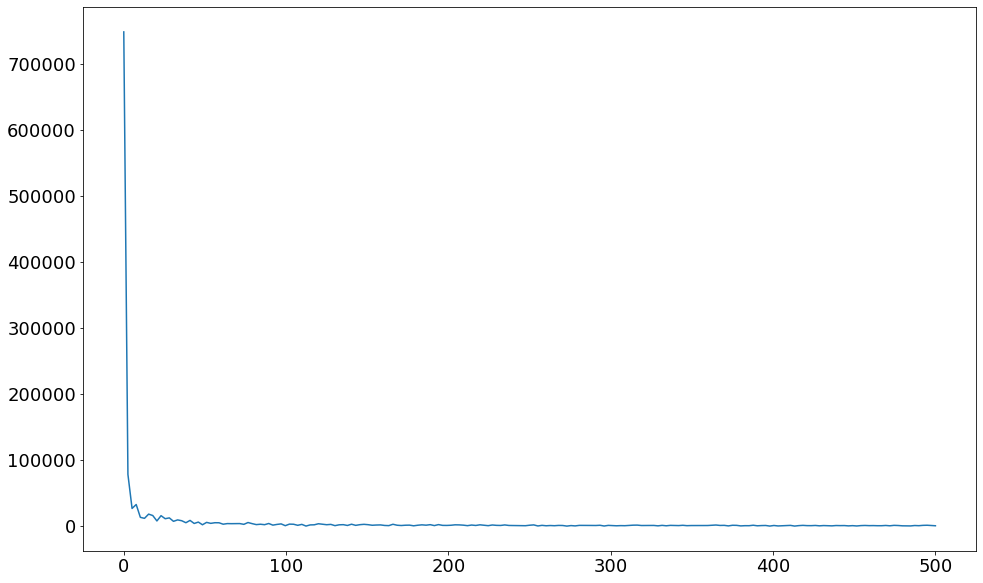

In [11]:
n    = len(data['Close'])
yf   = rfft(data['Close'].to_list())
xf   = rfftfreq(n,data_step)
plt.plot(xf,np.abs(yf))

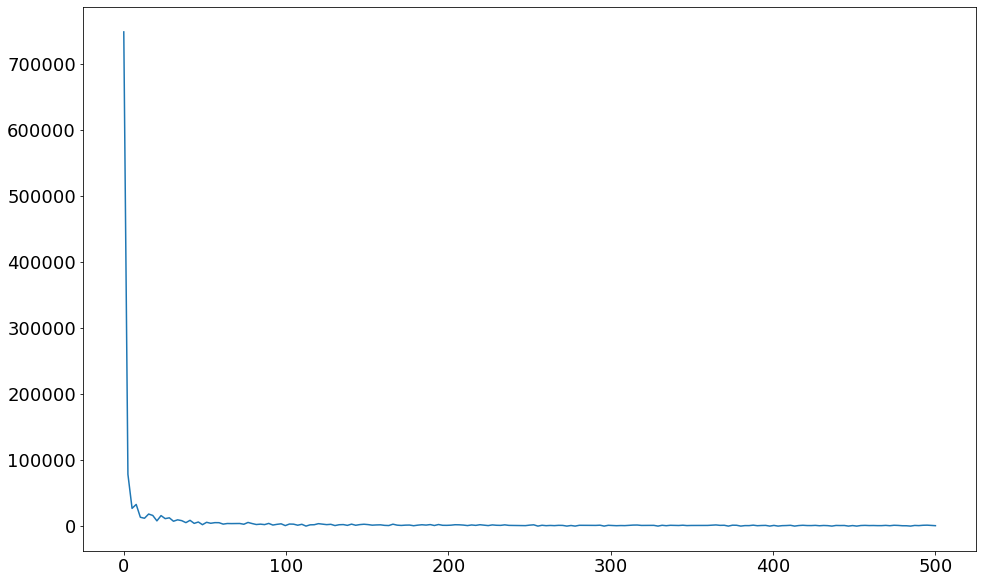

In [12]:
yf_abs      = np.abs(yf) 
indices     = yf_abs>500   # filter out those value under 300
yf_clean    = indices * yf # noise frequency will be set to 0
plt.plot(xf,np.abs(yf_clean))

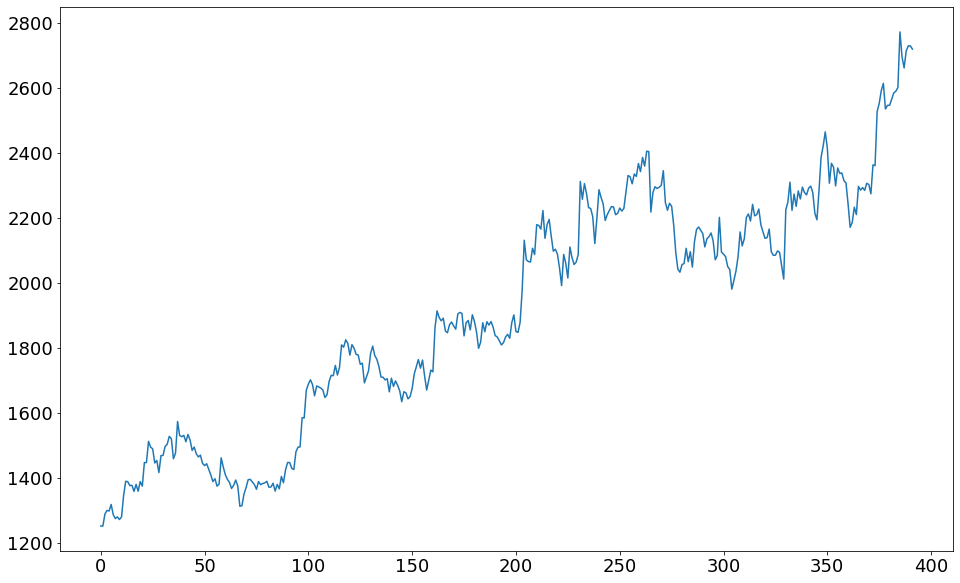

In [13]:
new_f_clean = irfft(yf_clean)
n= np.arange(start=0,stop=n)
plt.plot(n,new_f_clean)

<ipython-input-14-5c4b2149bfa2>:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(n,new_f_clean,color='c',Linewidth=1.5,label='New')
<ipython-input-14-5c4b2149bfa2>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(n,data['Close'].to_list(),color='k',Linewidth=2,label='Actual')


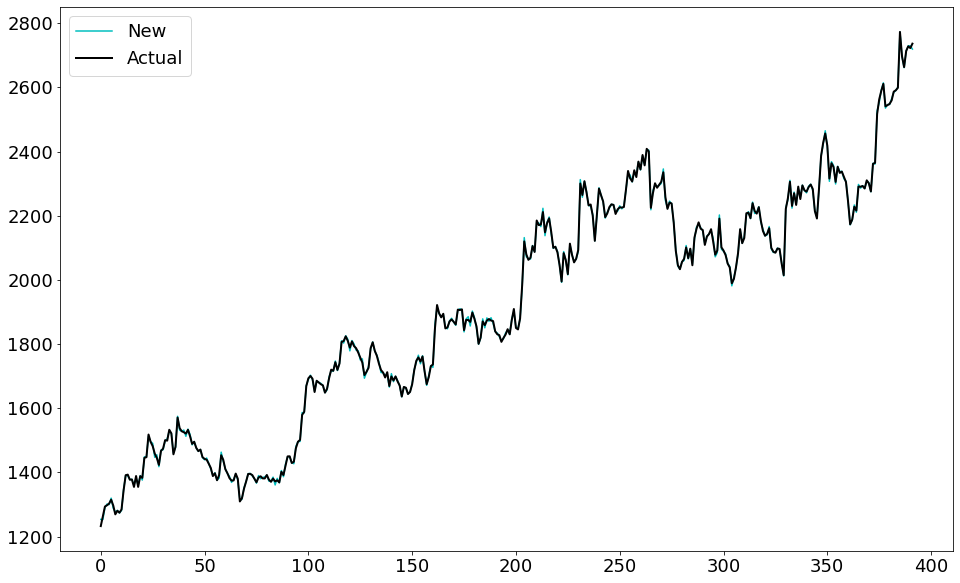

In [14]:
plt.plot(n,new_f_clean,color='c',Linewidth=1.5,label='New')
plt.plot(n,data['Close'].to_list(),color='k',Linewidth=2,label='Actual')
plt.legend()

In [15]:
data

,Close
Date,
2021-01-01,1232.699951
2021-01-04,1262.900024
2021-01-05,1293.599976
2021-01-06,1297.650024
2021-01-07,1302.650024
...,...
2022-07-25,2662.899902
2022-07-26,2713.399902
2022-07-27,2728.149902


In [16]:
y=data['Close'].to_list()
f=abs(np.fft.fft(y))

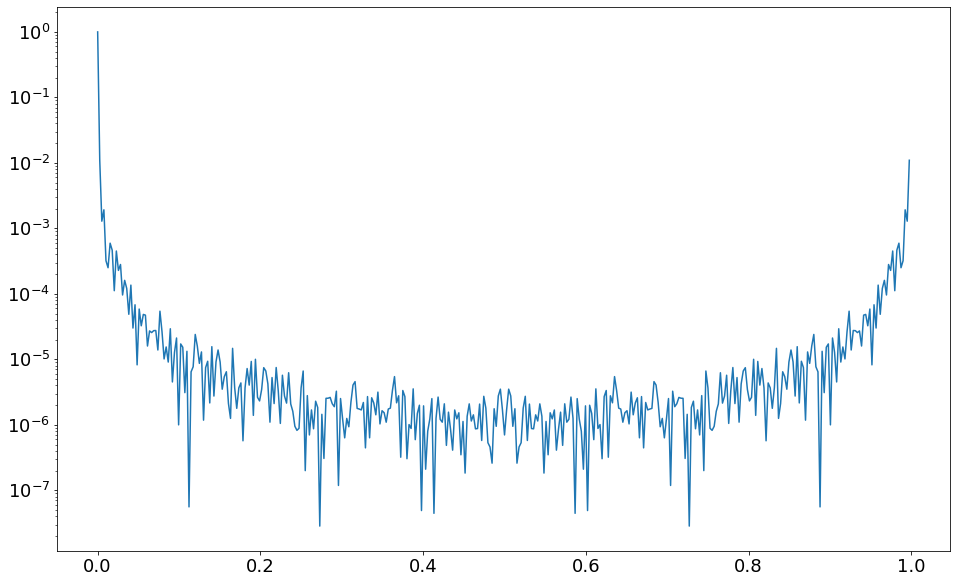

In [17]:
num=np.size(data)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum)

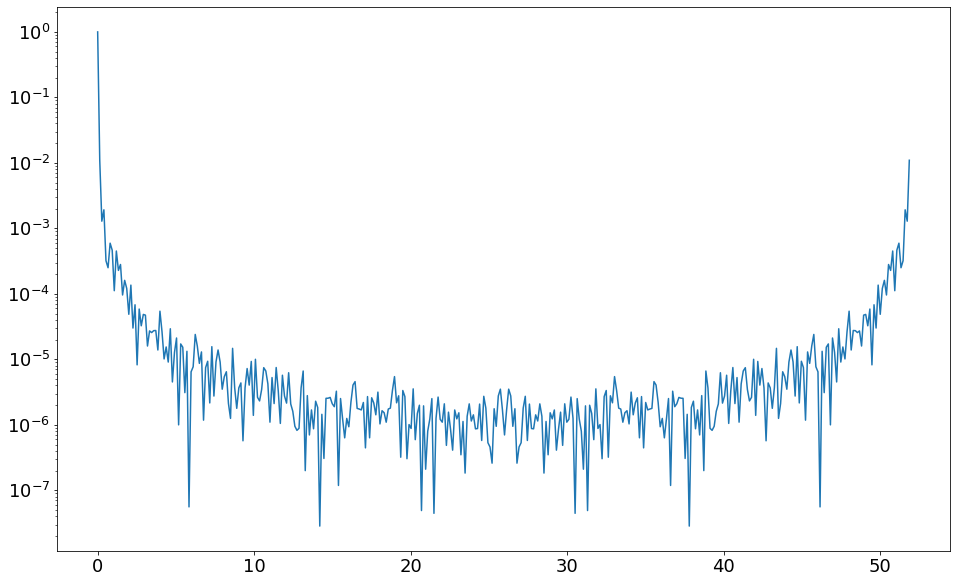

In [18]:
# improve the plot by adding periods in number of weeks rather than  frequency
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/52)
plt.semilogy(results['period'], results['nspectrum'])

([<matplotlib.axis.XTick at 0x1e06f8ae3d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

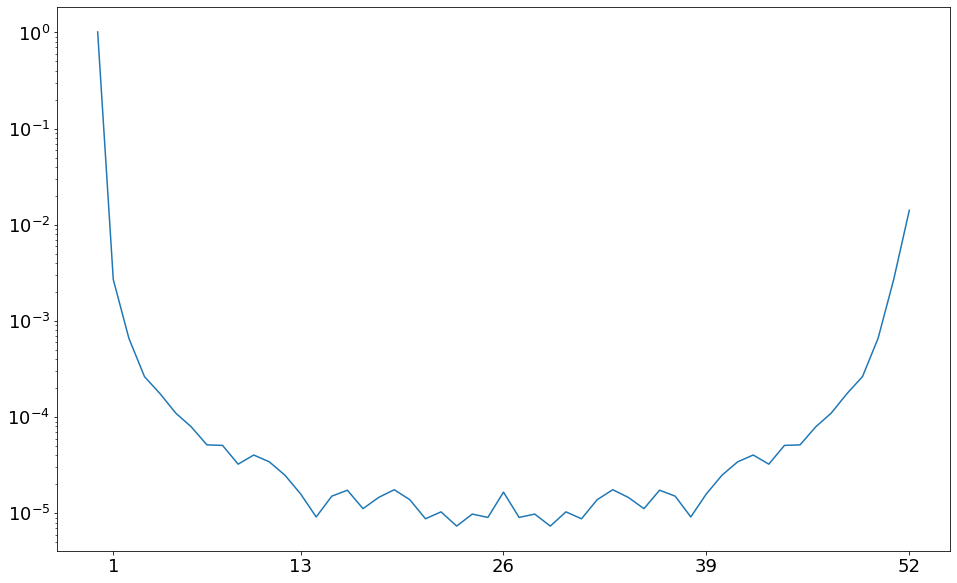

In [19]:
# improve the plot by convertint the data into grouped per week to avoid peaks
results['period_round'] = results['period'].round()
grouped_week = results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)
plt.xticks([1, 13, 26, 39, 52])

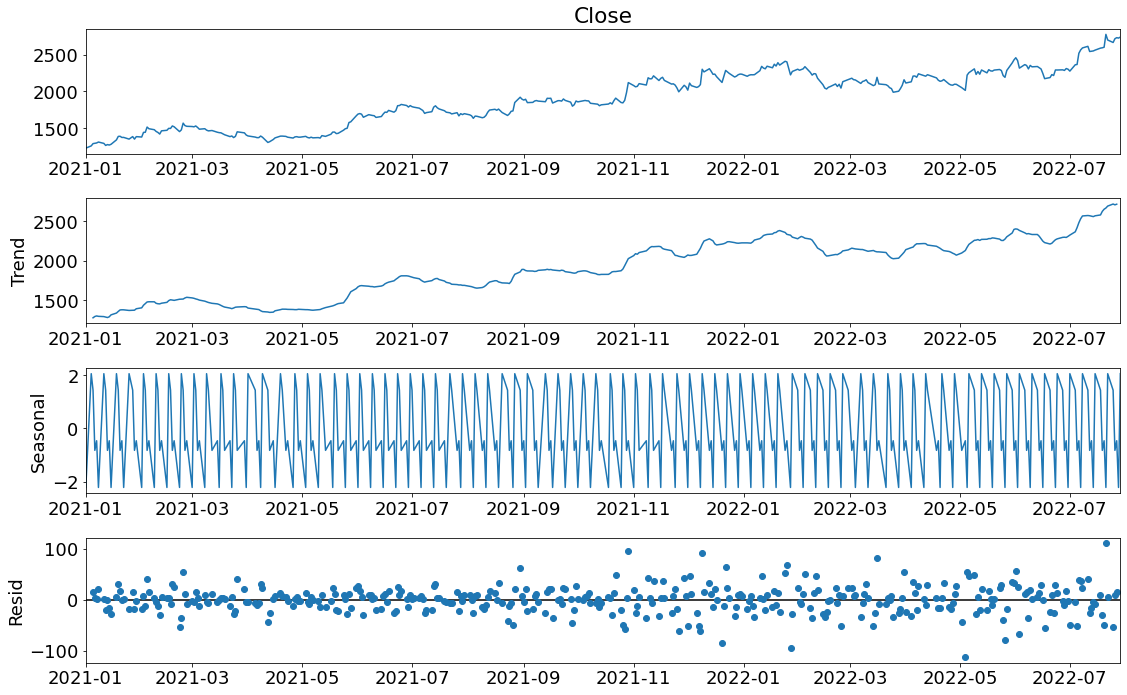

In [20]:
# use the seasonal_decompose function to observe the same conclusion
import statsmodels.api as sm
#data.index=data.index.astype('datetime64[ns]')
data.asfreq('d')
res = sm.tsa.seasonal_decompose(data.Close,period=5)
resplot = res.plot()

In [21]:
import statsmodels.datasets
da=statsmodels.datasets.co2.load_pandas().data

In [22]:
da.co2.interpolate(inplace=True)
da.co2
da.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2284 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


In [23]:
data.Close.interpolate(inplace=True)

<ipython-input-23-ba663757f54f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Close.interpolate(inplace=True)


In [24]:
data

,Close
Date,
2021-01-01,1232.699951
2021-01-04,1262.900024
2021-01-05,1293.599976
2021-01-06,1297.650024
2021-01-07,1302.650024
...,...
2022-07-25,2662.899902
2022-07-26,2713.399902
2022-07-27,2728.149902


In [25]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [26]:
data=yahoo_data[['Close']]
#data=data.reset_index()
data.head()

,Close
Date,
2021-01-01,1232.699951
2021-01-04,1262.900024
2021-01-05,1293.599976
2021-01-06,1297.650024
2021-01-07,1302.650024


In [27]:
ts=data.Close
ts

Date
2021-01-01    1232.699951
2021-01-04    1262.900024
2021-01-05    1293.599976
2021-01-06    1297.650024
2021-01-07    1302.650024
                 ...     
2022-07-25    2662.899902
2022-07-26    2713.399902
2022-07-27    2728.149902
2022-07-28    2722.250000
2022-07-29    2736.149902
Name: Close, Length: 392, dtype: float64

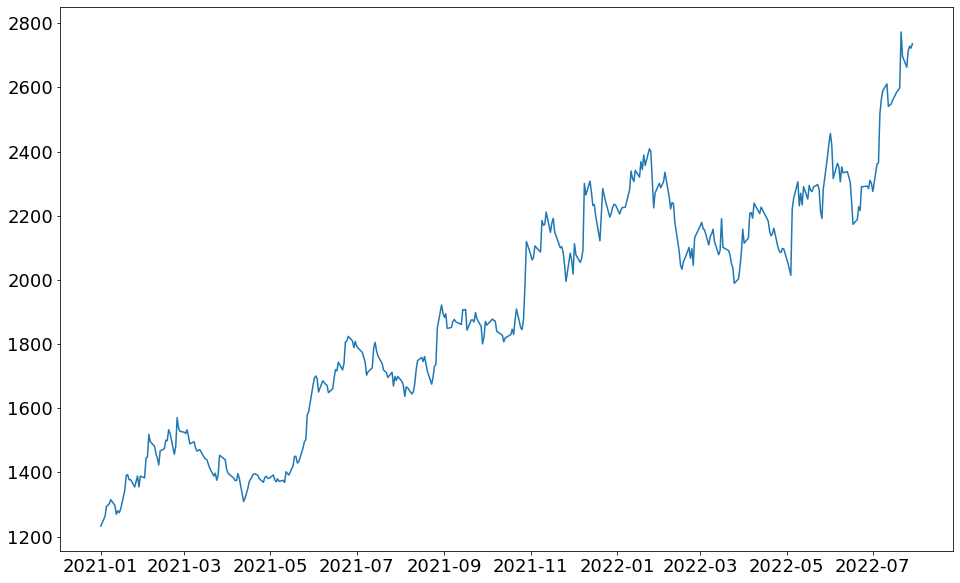

In [28]:
plt.plot(ts)

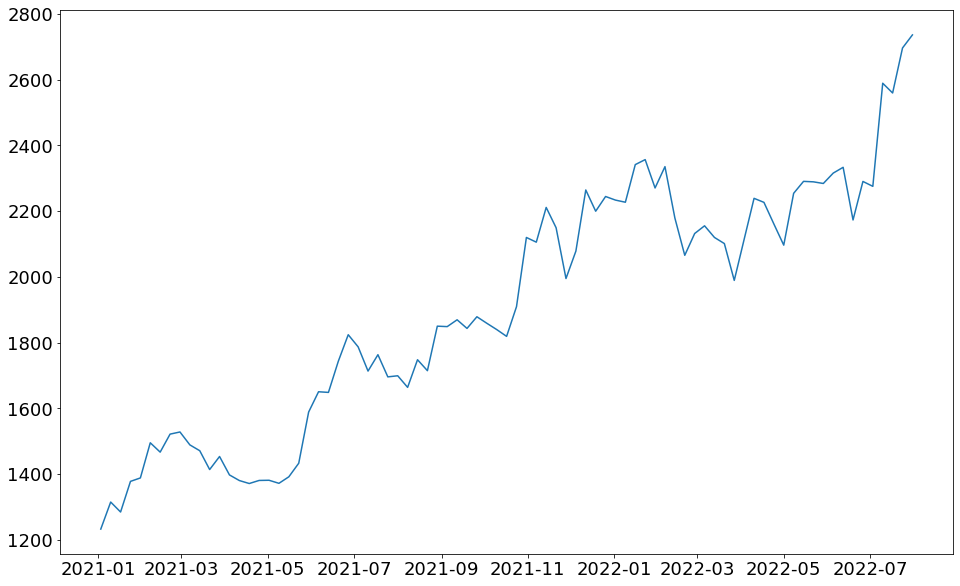

In [29]:
ts_week=ts.resample('w').last()
plt.plot(ts_week)

In [68]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(window=7, center=False).mean()
    rolstd=timeseries.rolling(window=7,center=False).std()
    ori=plt.plot(timeseries, color='blue', label="Original")
    mean_plot=plt.plot(rolmean, color='red', label="Mean")
    std_plot=plt.plot(rolstd, color='black', label='std')
    plt.legend()
    plt.show()
    
    #perform Dekyfuller test
    dtest=adfuller(timeseries,autolag='AIC')
    print("Test stat ",dtest[0])

    for key,values in dtest[4].items():
        print("Critical Value ",key,"=",values,"Dickey-Fuller Pass" if values >  dtest[0] else "Dickey-Fuller Fail")
        
    

<ipython-input-68-86f67f16f7a7>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Test stat  -0.7384358287658128
Critical Value  1% = -3.4471856790801514 Dickey-Fuller Fail
Critical Value  5% = -2.868960436182993 Dickey-Fuller Fail
Critical Value  10% = -2.5707229006220524 Dickey-Fuller Fail


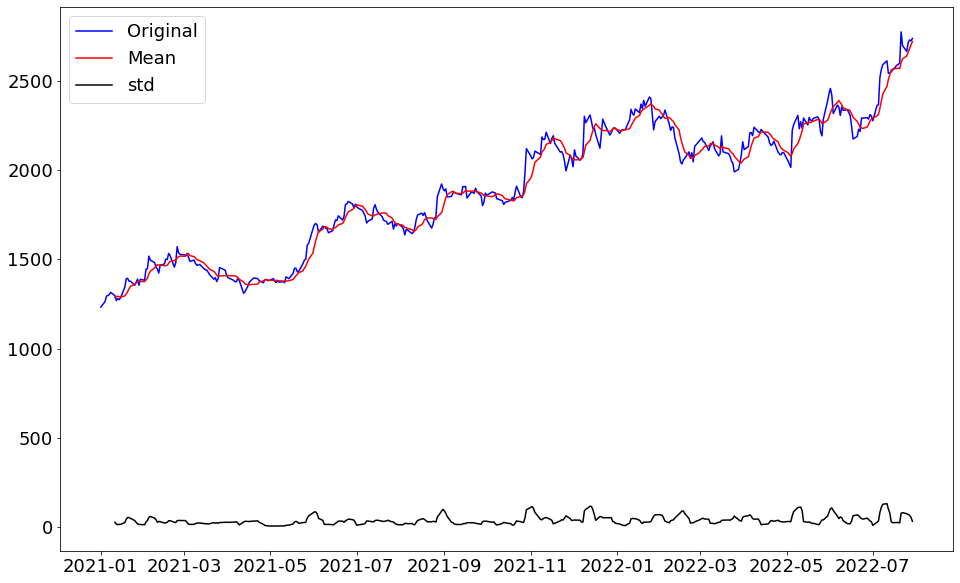

In [69]:
test_stationarity(ts)

<ipython-input-68-86f67f16f7a7>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Test stat  -20.063239399950547
Critical Value  1% = -3.4472291365835566 Dickey-Fuller Pass
Critical Value  5% = -2.8689795375849223 Dickey-Fuller Pass
Critical Value  10% = -2.5707330834976987 Dickey-Fuller Pass


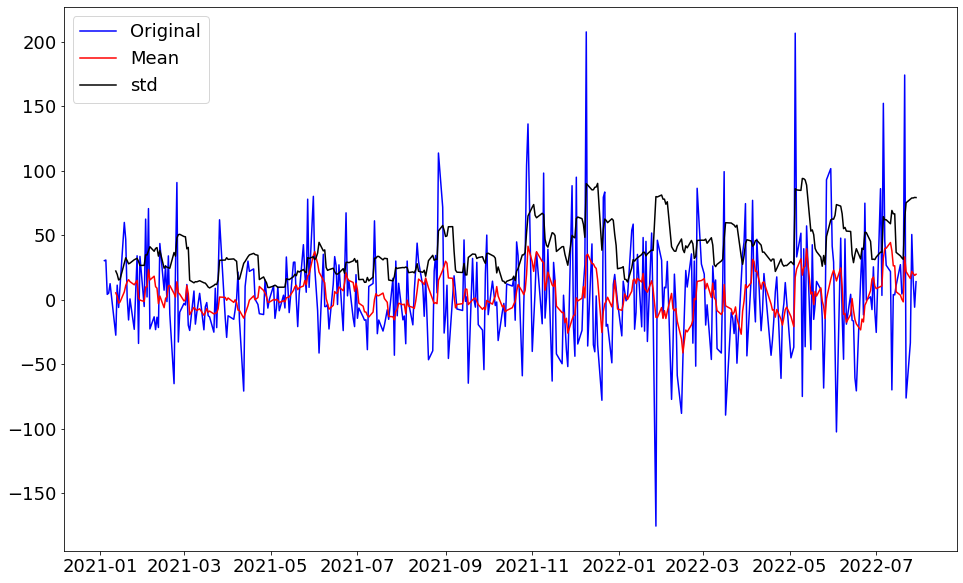

In [75]:
ts_lag=ts-ts.shift()
ts_lag.dropna(inplace=True)
test_stationarity(ts_lag)

<ipython-input-68-86f67f16f7a7>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Test stat  -1.2210960126722992
Critical Value  1% = -3.4471856790801514 Dickey-Fuller Fail
Critical Value  5% = -2.868960436182993 Dickey-Fuller Fail
Critical Value  10% = -2.5707229006220524 Dickey-Fuller Fail


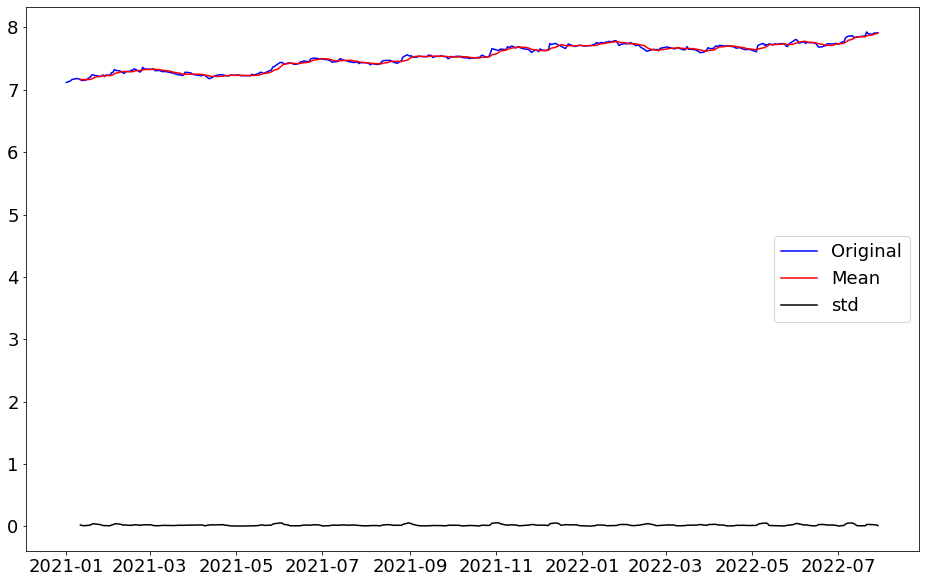

In [70]:
log_ts=np.log(ts)
test_stationarity(log_ts)


<ipython-input-68-86f67f16f7a7>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Test stat  -19.65084711954708
Critical Value  1% = -3.4472291365835566 Dickey-Fuller Pass
Critical Value  5% = -2.8689795375849223 Dickey-Fuller Pass
Critical Value  10% = -2.5707330834976987 Dickey-Fuller Pass


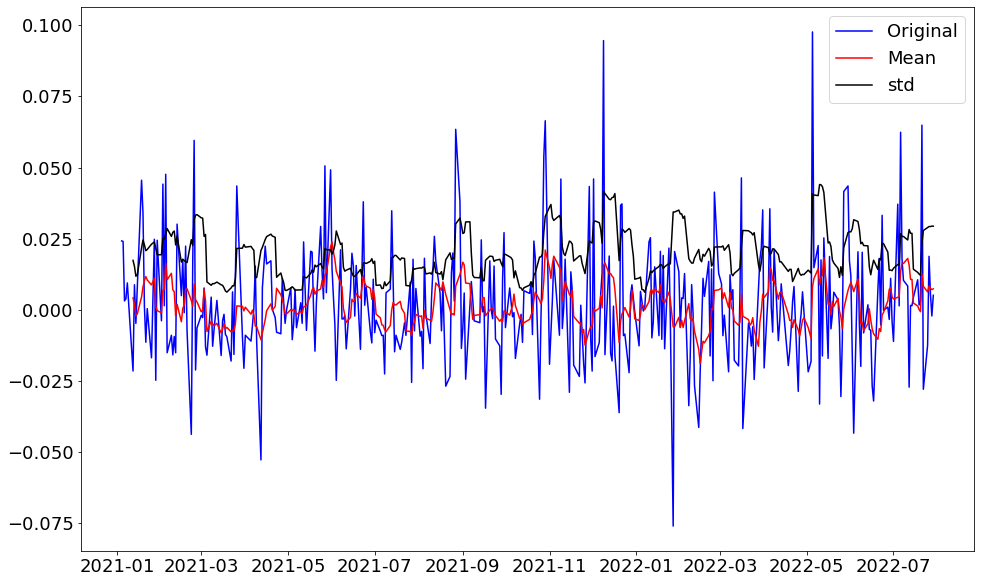

In [79]:
log_ts_diff=log_ts-log_ts.shift()
#log_ts_diff=log_ts_diff-log_ts_diff.shift()
log_ts_diff.dropna(inplace=True)
test_stationarity(log_ts_diff)